In [1]:
import pandas as pd
import numpy as np


In [2]:
dataFrame = pd.read_excel("maliciousornot.xlsx")

In [3]:
dataFrame

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,SOURCE_A,SOURCE_B,SOURCE_C,SOURCE_D,SOURCE_F,SOURCE_E,SOURCE_G,SOURCE_H,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,0.101956,1418.390000,1.172665,11125.618000,198.704133,0.008289,0.063523,0.069598,0.020557,0.038899,0.008022,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,0.073407,0.704014,0.950645,4401.542667,95.958293,0.006768,0.016943,0.024093,0.017357,0.017992,0.004575,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,0.077707,0.965801,1.019298,5939.103333,121.800193,0.007966,0.051891,0.049637,0.026658,0.029145,0.005921,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,0.126217,0.641967,1497.405333,4462.423333,35.271927,0.011800,0.096606,0.073329,0.024184,0.077241,0.011927,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,0.076204,0.980826,1.012044,7044.022667,122.331280,0.014883,0.031878,0.073679,0.024417,0.022746,0.006626,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,0.072837,1523.312000,1626.938667,9939.092667,205.569400,0.013342,0.037448,0.067331,0.031787,0.014430,0.005491,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,0.071671,0.991578,3190.406000,6739.619333,128.289813,0.007473,0.031386,0.051166,0.021736,0.024585,0.003236,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,0.073160,0.591190,1392.483333,4436.516667,62.888433,0.007646,0.048329,0.061269,0.020168,0.017072,0.005041,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,0.090881,940.412000,2066.056667,7476.664000,111.683640,0.008448,0.079767,0.092189,0.021554,0.030104,0.008012,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [5]:
dataFrame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,SOURCE_A,SOURCE_B,SOURCE_C,SOURCE_D,SOURCE_F,SOURCE_E,SOURCE_G,SOURCE_H,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,1.141613,102.672734,1054.061525,3333.335724,424.041644,0.009134,0.235648,1.549989,0.090850,0.309790,0.019027,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,9.374137,365.368355,1057.620796,2298.396221,2021.142069,0.003906,2.215631,23.059178,1.035261,2.788495,0.331812,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,0.064715,0.144430,0.466579,0.999220,13.056960,0.003455,0.002917,0.000000,0.000000,0.010210,0.001159,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,0.074737,0.304533,1.108708,1927.132167,24.015480,0.006637,0.016901,0.019352,0.010198,0.019436,0.002907,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,0.079767,0.444688,1325.126000,2827.712667,34.255090,0.008242,0.026800,0.033860,0.014313,0.024275,0.004155,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,0.086013,0.764862,1814.114333,4181.336000,66.709667,0.010620,0.042212,0.055091,0.019213,0.030505,0.005840,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,101.036000,3721.492667,5046.618667,12703.334000,12737.012667,0.040324,34.974000,512.952000,15.544000,40.155333,7.772000,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [7]:
dataFrame.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [8]:
import matplotlib.pyplot as plt
import seaborn as sbn

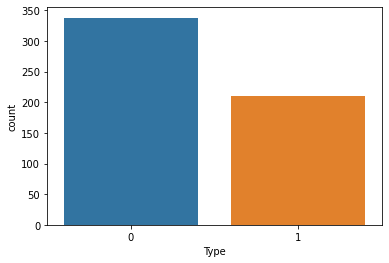

In [9]:
sbn.countplot(x="Type", data = dataFrame)

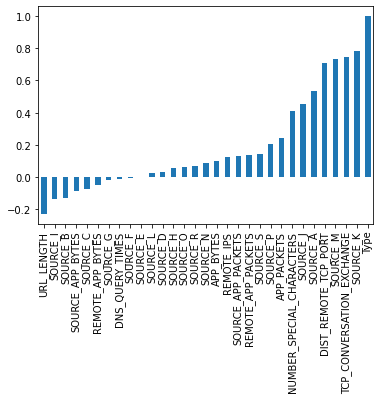

In [12]:
dataFrame.corr()["Type"].sort_values().plot(kind = "bar")

In [14]:
y = dataFrame["Type"].values
x = dataFrame.drop("Type", axis=1).values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.3 , random_state= 15)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(x_train )

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
x_train = scaler.transform(x_train)

In [21]:
x_test = scaler.transform(x_test)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import  Dense ,Activation ,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
x_train.shape

(383, 30)

In [24]:
model = Sequential()

model.add(Dense(units = 30 , activation="relu"))
model.add(Dense(units = 15 , activation="relu"))
model.add(Dense(units = 15 , activation="relu"))
model.add(Dense(units = 1 , activation="sigmoid"))

model.compile(loss=  "binary_crossentropy", optimizer = "adam")

In [25]:
model.fit(x = x_train ,y = y_train , epochs= 700, validation_data=(x_test ,y_test) , verbose =1)

Epoch 1/700
12/12 [==============================] - 1s 40ms/step - loss: 0.7065 - val_loss: 0.6963
Epoch 2/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6891 - val_loss: 0.6897
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6796 - val_loss: 0.6843
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6733 - val_loss: 0.6767
Epoch 5/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6570 - val_loss: 0.6661
Epoch 6/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6362 - val_loss: 0.6453
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6068 - val_loss: 0.6174
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5760 - val_loss: 0.5840
Epoch 9/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5303 - val_loss: 0.5429
Epoch 10/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4920 - val_loss: 0.5043
Epoch 11

In [26]:
model.history.history

{'loss': [0.7030866146087646,
  0.6875549554824829,
  0.6771852374076843,
  0.6663796305656433,
  0.6527498960494995,
  0.6330649256706238,
  0.6040125489234924,
  0.5673072934150696,
  0.5237868428230286,
  0.4730178415775299,
  0.4210950434207916,
  0.3716350197792053,
  0.3294229209423065,
  0.29537490010261536,
  0.26624420285224915,
  0.2425023913383484,
  0.2229738086462021,
  0.2069055736064911,
  0.1940360963344574,
  0.18286257982254028,
  0.17780642211437225,
  0.1672249734401703,
  0.15639594197273254,
  0.1529107391834259,
  0.14703382551670074,
  0.14248453080654144,
  0.1362350732088089,
  0.13364996016025543,
  0.12793003022670746,
  0.12337043881416321,
  0.12074945867061615,
  0.11768916994333267,
  0.11819532513618469,
  0.11246325820684433,
  0.11054287850856781,
  0.10612060874700546,
  0.10397827625274658,
  0.10464535653591156,
  0.10942171514034271,
  0.1018323302268982,
  0.09757436066865921,
  0.0947098657488823,
  0.09195663779973984,
  0.09133400022983551,
  

In [27]:
modelKaybi = pd.DataFrame(model.history.history)

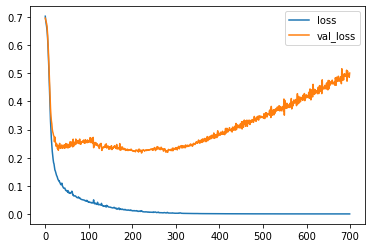

In [28]:
modelKaybi.plot()

In [29]:
model = Sequential()

model.add(Dense(units = 30 , activation="relu"))
model.add(Dense(units = 15 , activation="relu"))
model.add(Dense(units = 15 , activation="relu"))
model.add(Dense(units = 1 , activation="sigmoid"))

model.compile(loss=  "binary_crossentropy", optimizer = "adam")

In [30]:
earlyStopping = EarlyStopping(monitor="val_loss", mode = "min" , verbose = 1 , patience=25) 

In [32]:
model.fit(x = x_train, y= y_train , epochs = 700, validation_data=(x_test, y_test), verbose=1 , callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 19ms/step - loss: 0.6831 - val_loss: 0.6819
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6603 - val_loss: 0.6673
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6476 - val_loss: 0.6495
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6159 - val_loss: 0.6305
Epoch 5/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5618 - val_loss: 0.6020
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5318 - val_loss: 0.5633
Epoch 7/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5081 - val_loss: 0.5395
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4562 - val_loss: 0.4965
Epoch 9/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4159 - val_loss: 0.4604
Epoch 10/700
12/12 [==============================] - 0s 6ms/step - loss: 0.3677 - val_loss: 0.4332
Epoch 11

In [33]:
modelKaybi = pd.DataFrame(model.history.history)

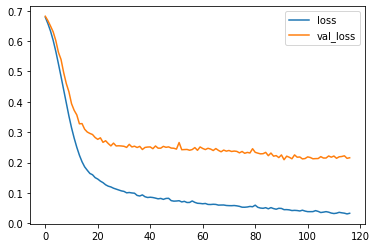

In [34]:
modelKaybi.plot()

In [36]:
model = Sequential()

model.add(Dense(units = 30 , activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units = 15 , activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units = 15 , activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units = 1 , activation="sigmoid"))

model.compile(loss=  "binary_crossentropy", optimizer = "adam")

In [37]:
model.fit(x = x_train, y= y_train , epochs = 700, validation_data=(x_test, y_test), verbose=1 , callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 18ms/step - loss: 0.7108 - val_loss: 0.6964
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.7003 - val_loss: 0.6943
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.7225 - val_loss: 0.6929
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6904 - val_loss: 0.6923
Epoch 5/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6823 - val_loss: 0.6923
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6804 - val_loss: 0.6912
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6816 - val_loss: 0.6906
Epoch 8/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6615 - val_loss: 0.6897
Epoch 9/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6674 - val_loss: 0.6882
Epoch 10/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6609 - val_loss: 0.6871
Epoch 11

In [38]:
kayipDF = pd.DataFrame(model.history.history)

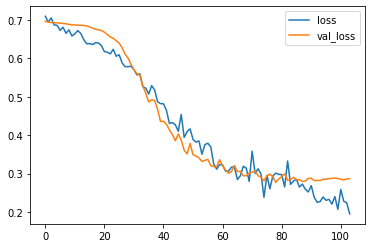

In [39]:
kayipDF.plot()

In [40]:
tahminlerimiz = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
tahminlerimiz

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
    

In [42]:
from sklearn.metrics import classification_report ,confusion_matrix

In [45]:
print(classification_report(y_test, tahminlerimiz))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        91
           1       0.90      0.84      0.87        74

    accuracy                           0.88       165
   macro avg       0.89      0.88      0.88       165
weighted avg       0.89      0.88      0.88       165



In [46]:
print(confusion_matrix(y_test , tahminlerimiz))

[[84  7]
 [12 62]]


In [ ]:
model.save("tensoflow")